# Hands On - MLP on MNIST dataset

▶ The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

▶ The MNIST data consists of 60,000 training images and 10,000 test images

▶ Each image is a crude 28 x 28 (784 pixels) handwritten digit from "0" to "9." Each pixel value is a grayscale integer between 0 and 255.

**Import essential libraries**

In [1]:
"""
keras.datasets :  holds a list of custom pre-built datasets for ready use
keras.utils : package that contains utils / helper functions for pre-processing data
"""

#Importing MNIST dataset
from keras.datasets import mnist
# The np_utils module provides utilities for converting data types and manipulating arrays.
from keras.utils import np_utils

In [30]:
"""
matplotlib : collection of functions that creates various types of plots and visualizations.
matplotlib inline :  to set the backend of matplotlib to inline, ensuring that plots are displayed within the notebook cells.
"""
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

**Load dataset**

In [3]:
"""
X_train : input data, which are images of handwritten digits
y_train : the corresponding labels, which are the actual digits represented in the images.
X_test  : the input data for testing
y_test  : the corresponding labels for the testing data.

"""

#load_data : unpacks the data into tuples : (X_train, y_train) and (X_test, y_test)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [18]:
# print(X_train[0])

In [8]:
"""
.shape : helps to view the dimensions of the numpy array
"""

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


**Visualizing train and test images**

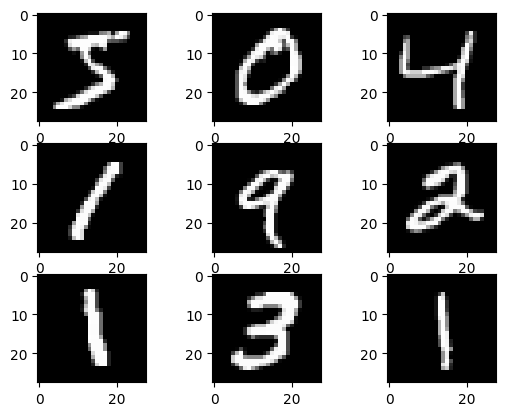

In [11]:
"""
plt.subplot() : divides the figure into a grid of subplots.
330 : shorthand notation for a 3x3 grid of subplots
1 + i : the position of the current subplot within the grid.
"""

for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

**Pre-processing : Training data**

---

> Reshape array

> Normalize data

> Do labelling


In [12]:
"""
Reshaping the input data from a 2D format to a 1D format

X_train.shape[0] : the number of samples in the training dataset.
X_train.shape[1] : the height of each image.
X_train.shape[2] : the width of each image.

rows = number of samples
columns = height * width (28 * 28 = 784)

"""

#convert 2d to 1d
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [14]:
"""
.shape : helps to view the dimensions of the input array
"""

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [15]:
"""
Pixel scaling : the original range of 0 to 255 to a new range of 0 to 1.
This normalization is done by dividing each pixel value by the maximum value (255 in this case).

pixel values are typically represented as integers between 0 and 255,
where 0 represents black and 255 represents white.

"""

X_train = X_train/255
X_test = X_test/255

In [19]:
# print(X_train[0])

**Pre-processing : Target values**


In [20]:
print("Class label of first image :", y_train[0])

Class label of first image : 5


In [21]:
"""
One-hot encoding is a technique used to represent categorical data, such as class labels, as binary vectors.
to_categorical() from the np_utils module :
      Arguments :
          y_train  : original class labels
          10.      : total number of classes

"""

#One-hot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [22]:
"""
Each element of the vector represents the presence or absence of a specific class
  1 indicating the presence of the class
  0 indicating the absence
"""

print("After converting the output into a vector : ",Y_train[0])

After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**Building a basic Model**

In [23]:
"""

keras.model
  -> Sequential : Used to build models layer by layer.
                  provides a linear stack of layers, where each layer has exactly one input tensor and one output tensor.

keras.layers
  -> Dense      : represents a fully connected layer
  -> Activation : Functions that introduces non-linearity to the model

"""

from keras.models import Sequential
from keras.layers import Dense, Activation

In [25]:
"""
input_dim : number of features(columns) in the input data
output_dim : there are 10 possible output classes, corresponding to the digits 0 to 9.

"""

input_dim = X_train.shape[1] #784
output_dim = 10 #0-9

In [26]:
"""
model : an object used to build and train the model

model :

      - Sequential class - represents a linear stack of layers
      - Dense layer : a fully connected layer
          - softmax activation : used for multi-class classification problems.

      - model compile
"""

model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
"""
fit() method trains the model on the given training data and labels

Arguments :
    - X_train    : input training data, which consists of the preprocessed images after converting them to a 1D format.
    - Y_train    : the target training data, which consists of the one-hot encoded labels corresponding to the training data.
    - batch_size : the number of samples processed at each iteration before updating the model's parameters.
    - epochs     : Iteration or number of times the entire training dataset will be passed through the model during training.
    - verbose    : shows the progress bar when training
    - validation_data : provides the testing data and labels to be used for validation during training.

"""

history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 1.2766 - accuracy: 0.6968 - val_loss: 0.8082 - val_accuracy: 0.8354
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.7152 - accuracy: 0.8420 - val_loss: 0.6050 - val_accuracy: 0.8637
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5866 - accuracy: 0.8600 - val_loss: 0.5241 - val_accuracy: 0.8752
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5249 - accuracy: 0.8692 - val_loss: 0.4784 - val_accuracy: 0.8817
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4875 - accuracy: 0.8758 - val_loss: 0.4490 - val_accuracy: 0.8859
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4617 - accuracy: 0.8801 - val_loss: 0.4276 - val_accuracy: 0.8901
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4426 - accuracy: 0.8836 - val_loss: 0.4117 - val_accuracy: 0.8925
Epoch 

**Basic model evaluation**

In [28]:
"""
evaluates the trained neural network model on the testing data (X_test and Y_test)
prints the test score and accuracy

"""
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3353326618671417
Test accuracy: 0.9093999862670898


**Let's visualize the test results**

313/313 [==============================] - 0s 1ms/step
[7.3527393e-05 6.9670583e-05 6.9409165e-05 9.7711378e-01 1.3258168e-05
 1.1571190e-02 8.0137681e-05 6.9211628e-03 1.3642245e-03 2.7235535e-03]
3


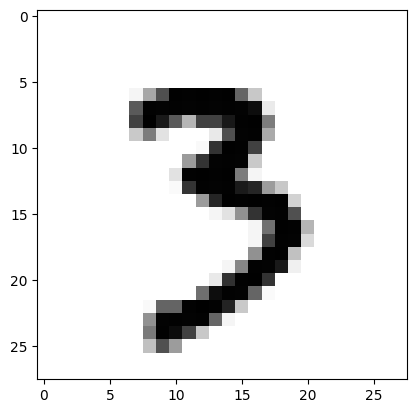

In [34]:
"""
image_index : random image (choose < 10000)

reshape(28, 28) : the flattened image is set back into a 2D format of 28x28 pixels

cmap='Greys' : image will be displayed in black and white.

pred[image_index] : retrieves the predicted probabilities for the image at the specified index

np.argmax() : index of the maximum value in the predicted probabilities array
              indicating the predicted class label.
"""

image_index = 30
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))

**Let's dive deep into MLP 💪**

In [36]:
# lets define constants for readability
NB_EPOCHS = 20
BATCH_SIZE = 128

Model :  MLP + Sigmoid activation + SGDOptimizer

In [35]:
"""
model :

    Sequential : defines the MLP model
    dense_1 : has 512 neurons (specify the input shape)
    dense_2 : has 128 neurons (automatically takes the output shape of the previous layer as its input)

Summary : defines the model's architecture, showing the number of parameters and the shape of each layer's output.

"""


# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [37]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_sigmoid.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 7s 12ms/step - loss: 2.2690 - accuracy: 0.2095 - val_loss: 2.2231 - val_accuracy: 0.3945
Epoch 2/20
469/469 [==============================] - 5s 12ms/step - loss: 2.1817 - accuracy: 0.4363 - val_loss: 2.1282 - val_accuracy: 0.5131
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 2.0700 - accuracy: 0.5492 - val_loss: 1.9915 - val_accuracy: 0.6132
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 1.9125 - accuracy: 0.6155 - val_loss: 1.8075 - val_accuracy: 0.6481
Epoch 5/20
469/469 [==============================] - 6s 14ms/step - loss: 1.7114 - accuracy: 0.6633 - val_loss: 1.5871 - val_accuracy: 0.7049
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 1.4904 - accuracy: 0.7039 - val_loss: 1.3648 - val_accuracy: 0.7245
Epoch 7/20
469/469 [==============================] - 6s 14ms/step - loss: 1.2807 - accuracy: 0.7369 - val_loss: 1.1691 - val_accuracy: 0.7608

In [38]:
"""
evaluates the trained neural network model on the testing data (X_test and Y_test)
prints the test score and accuracy

"""
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3353326618671417
Test accuracy: 0.9093999862670898


313/313 [==============================] - 1s 3ms/step
[7.2837214e-04 1.6410019e-03 7.1181974e-04 8.9970487e-01 7.6029602e-05
 6.8559922e-02 8.8733294e-05 1.5558334e-02 9.5163621e-03 3.4145541e-03]
3


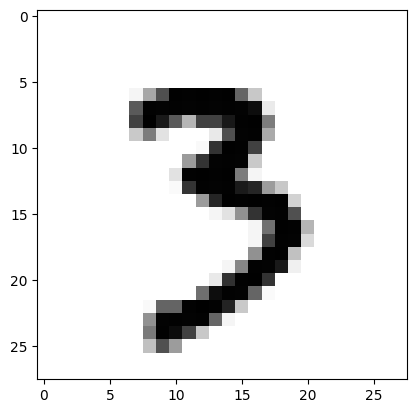

In [40]:
"""
image_index : random image (choose < 10000)

reshape(28, 28) : the flattened image is set back into a 2D format of 28x28 pixels

cmap='Greys' : image will be displayed in black and white.

pred[image_index] : retrieves the predicted probabilities for the image at the specified index

np.argmax() : index of the maximum value in the predicted probabilities array
              indicating the predicted class label.
"""

image_index = 30
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_sigmoid.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))

 Model : MLP + Sigmoid activation + ADAM Optimizer

In [42]:
model_adam = Sequential()
model_adam.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_adam.add(Dense(128, activation='sigmoid'))
model_adam.add(Dense(output_dim, activation='softmax'))

model_adam.summary()
model_adam.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_adam = model_adam.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 128)               65664     
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 12s 23ms/step - loss: 0.5572 - accuracy: 0.8503 - val_loss: 0.2525 - val_accuracy: 0.9250
Epoch 2/20
469/469 [==============================] - 11s 23ms/step - loss: 0.2238 - accuracy: 0.9346 - val_loss: 0.1895 - val_accuracy: 0.9438
Epoch 3/20
469/469 [====

In [43]:
score = model_adam.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.07010535895824432
Test accuracy: 0.9815999865531921


<ipython-input-49-5319e87e68df>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


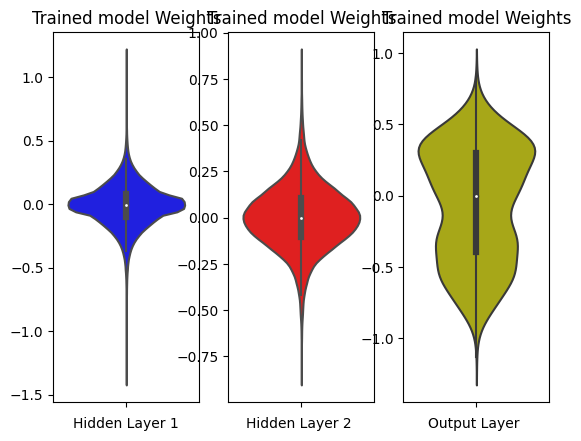

In [49]:
import seaborn as sns

w_after = model_adam.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 Model : MLP + ReLu Activation + ADAM Optimizer

In [50]:
from keras.initializers import RandomNormal  #for normalization

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 128)               65664     
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
469/469 [==============================] - 8s 14ms/step - loss: 0.2288 - accuracy: 0.9331 - val_loss: 0.1079 - val_accuracy: 0.9669
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0857 - accuracy: 0.9738 - val_loss: 0.0784 - val_accuracy: 0.9761
Epoch 3/20
469/469 [=

In [51]:
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.09747106581926346
Test accuracy: 0.980400025844574


313/313 [==============================] - 1s 3ms/step
[4.0153721e-28 1.5795681e-26 7.4352799e-24 9.9999994e-01 6.9084597e-30
 6.5909477e-21 1.5853539e-30 1.0488066e-23 3.4055208e-17 4.9032432e-23]
3


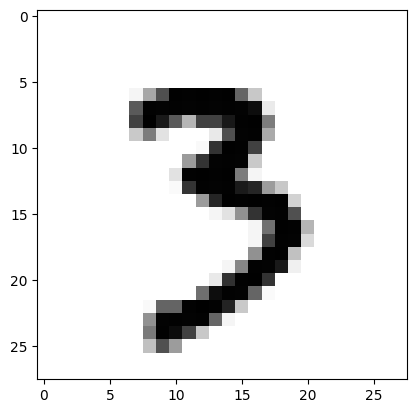

In [52]:
"""
image_index : random image (choose < 10000)

reshape(28, 28) : the flattened image is set back into a 2D format of 28x28 pixels

cmap='Greys' : image will be displayed in black and white.

pred[image_index] : retrieves the predicted probabilities for the image at the specified index

np.argmax() : index of the maximum value in the predicted probabilities array
              indicating the predicted class label.
"""

image_index = 30
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_relu.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))

In [54]:
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1).
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from tensorflow.keras.layers import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))

model_batch.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_14 (Dense)            (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 471,434
Trainable params: 470,154
Non-tr

In [55]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_batch = model_batch.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 10s 17ms/step - loss: 0.3003 - accuracy: 0.9111 - val_loss: 0.2158 - val_accuracy: 0.9380
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1745 - accuracy: 0.9494 - val_loss: 0.1724 - val_accuracy: 0.9488
Epoch 3/20
469/469 [==============================] - 8s 16ms/step - loss: 0.1356 - accuracy: 0.9600 - val_loss: 0.1457 - val_accuracy: 0.9567
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1129 - accuracy: 0.9665 - val_loss: 0.1410 - val_accuracy: 0.9571
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0963 - accuracy: 0.9705 - val_loss: 0.1173 - val_accuracy: 0.9658
Epoch 6/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0834 - accuracy: 0.9748 - val_loss: 0.1232 - val_accuracy: 0.9640
Epoch 7/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0715 - accuracy: 0.9780 - val_loss: 0.1051 - val_accuracy: 0.96

In [57]:
score = model_batch.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.09101016074419022
Test accuracy: 0.9757000207901001


**Let's do some plotting**

In [56]:
# this function is used to update the plots for each epoch and error
# def plt_dynamic(x, vy, ty, ax, colors=['b']):
#     ax.plot(x, vy, 'b', label="Validation Loss")
#     ax.plot(x, ty, 'r', label="Train Loss")
#     plt.legend()
#     plt.grid()
#     fig.canvas.draw()

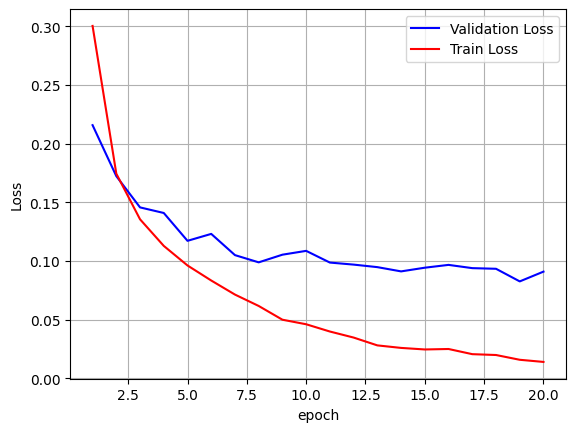

In [59]:
fig,ax = plt.subplots(1,1)

#set labels for x and y axis
ax.set_xlabel('epoch') ;
ax.set_ylabel('Loss')

# list of epoch numbers - range of x values
x = list(range(1,NB_EPOCHS+1))
# pick the val_loss values
vy = history_batch.history['val_loss']
# pick the training_loss values
ty = history_batch.history['loss']

#plot the values
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()
fig.canvas.draw()

# plt_dynamic(x, vy, ty, ax)